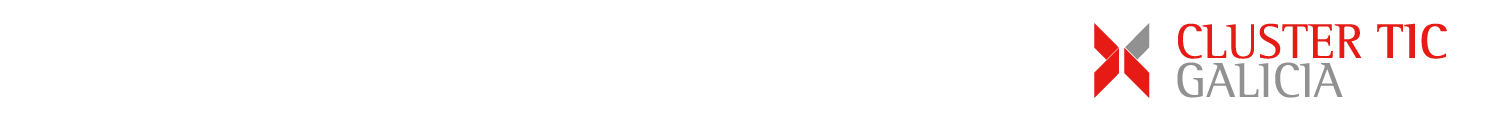
<a name = "inicio"></a>

<div style="font-size: 50px;text-align: center;height:60px;padding:10px;margin:10px 0 0 0;">Funciones</div>

Un elemento extremadamente útil es la posibilidad de definir y usar funciones. En realidad ya hemos usado funciones (como la función *range*), pero eran funciones definidas por Python -las llamadas **funciones integradas**- y que nos ofrecen una funcionalidad concreta que no siempre va a adaptarse a nuestras necesidades. Python nos permite definir nuestra propias funciones, lo que tiene dos grandes ventajas:

* Nos evita tener que escribir el mismo código una y otra vez en nuestro programa. En lugar de esto movemos ese código a la función e invocamos ésta con los argumentos adecuados cada vez que queramos ejecutar esas instrucciones.
* También nos permiten sacar más provecho de nuestro trabajo al poder reutilizar estas funciones en diferentes programas.

La estructura de una función es la siguiente:

def nombre-de-la-función(parámetro1, parámetro2, ...):

    código-de-la-función

    return valor-a-devolver

En su forma más simple, la función es llamada sin ningún argumento y no devuelve ningún valor, simplemente ejecuta el código que contiene:

In [1]:
def imprimeHola():
    print("Hola")

imprimeHola()

Hola


En el ejemplo anterior definimos la función -a la que hemos dado el nombre de "*imprimeHola*"-, entre paréntesis no añadimos el nombre de ningún parámetro y, con el sangrado que ya conocemos de cuatro espacios en blanco o un tabulador, hemos añadido el código que se ejecutará cuando se invoque la función, lo que podemos hacer con la instrucción "*imprimeHola()*", cosa que hacemos en la última línea de código de la celda. Obsérvese que, aun sin añadir ningún argumento, es necesario invocar la función con los paréntesis.

Lo más frecuente, sin embargo, es que la función requiera de cierta información para poder realizar su trabajo -información que se le va a pasar vía argumentos- y que queramos que devuelva el resultado de dicho trabajo -lo que haremos usando la sentencia *return*-.

Veamos un ejemplo concreto: Supongamos que tenemos en un diccionario las ventas realizadas por cada comercial de la empresa:

In [2]:
ventas_realizadas = {"Óscar": 15000, "Sonia": 12000, "Ángel": 9000}
ventas_realizadas

{'Óscar': 15000, 'Sonia': 12000, 'Ángel': 9000}

Y supongamos también que queremos calcular la comisión que le corresponde a cada comercial y que este cálculo es complejo (aunque en este ejemplo supondremos que simplemente es el 5% de las ventas). La estructura de nuestro programa escrita en pseudo-código sería algo como

para cada comercial en ventas:

    comisión a pagar = comisión(ventas-del-comercial)
    imprime comisión a pagar

En el anterior esquema, "*comisión*" debería ser una función que aceptase como argumento de entrada las ventas de un comercial y devolviese la comisión correspondiente. Escribamos el código llamando a esa función "*comision*":

In [3]:
def comision(ventas):
    comision_comercial = ventas * 0.05
    return comision_comercial

La función que hemos definido, *comision*, espera un argumento al que, dentro de la función, se va a llamar *ventas* (el parámetro *ventas*). Una vez realizados los cálculos pertinentes, la función devuelve un valor con la sentencia **return**. En este caso se trata de la comisión a pagar al comercial.

Podemos invocar nuestra función pasándole las ventas de uno de los comerciales:

In [4]:
comision(15000)

750.0

obteniendo como resultado la comisión a pagar. Si quisiéramos aplicar nuestra función a todos los comerciales (cuya información de ventas hemos almacenado en la variable *ventas_realizadas*, podríamos hacerlo usando un buble *for*:

In [5]:
for nombre, venta in ventas_realizadas.items():
    comision_comercial = comision(venta)
    print(nombre, ":", comision_comercial, "€")

Óscar : 750.0 €
Sonia : 600.0 €
Ángel : 450.0 €


El bucle *for* recorre la lista de tuplas, extrayéndose los dos valores de cada tupla (la clave y el valor) y almacenándose éstos en las variables *nombre* y *venta*.

### Documentación de la función

Si queremos documentar nuestra función, es común hacerlo añadiendo lo que se denomina el *docstring* tras la cabecera. El *docstring* se delimita por bloques de tres comillas dobles. Por ejemplo:

In [6]:
def comision(ventas):
    """Calcula la comisión a pagar en función de las ventas realizadas"""
    comision_comercial = ventas * 0.05
    return comision_comercial

Esta información es la que se muestra al ejecutar la función *help* pasando como argumento el nombre de nuestra función*

In [7]:
help(comision)

Help on function comision in module __main__:

comision(ventas)
    Calcula la comisión a pagar en función de las ventas realizadas



<div style="font-size: 40px;text-align: center;height:50px;padding:10px;margin:0 0 10px 0;">Tipos de argumentos</div>
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Cuando invocamos una función podemos pasar nuestros argumentos según diferentes métodos que vamos a llamar de la siguiente forma:

* Argumentos posicionales
* Argumentos con valor por defecto
* Argumentos posicionales arbitrarios
* Argumentos clave
* Argumentos clave arbitrarios

Veámoslos uno por uno con algún ejemplo.

# Argumentos posicionales
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En esta estrategia la función incluye en su definición un cierto número de parámetros y en la invocación de la función incluimos los valores que queremos pasar (uno para cada uno de los argumentos). En este caso el primer argumento será asignado al primer parámetro, el segundo argumento al segundo parámetro, etc. Por ejemplo:

In [8]:
def suma(a, b):
    return a + b

suma(3, 5)

8

En el código anterior estamos invocando la función con dos argumentos: 3 y 5, y la cabecera de la función incluye la definición de dos parámetros: *a* y *b*. Pues bien, el parámetro *a* recibirá el valor 3 y el parámetro *b* recibirá el valor 5, cosa que podemos comprobar fácilmente:

In [9]:
def suma(a, b):
    print("a:", a)
    print("b:", b)

suma(3, 5)

a: 3
b: 5


# Argumentos con valor por defecto
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En este segundo método incluimos en la definición de la función los valores que tomarán los parámetros en el caso de que la invocación a la función no incluya todos los argumentos necesarios. Por ejemplo, en la siguiente función definimos dos parámetros, *a* y *b*, y damos al segundo el valor por defecto de 0:

In [10]:
def suma(a, b = 0):
    return a + b

suma(3, 5)

8

Tal y como vemos, podemos seguir invocando la función con tantos argumentos como parámetros, y éstos siguen siendo asignados según su posición. Pero ahora podríamos no incluir argumentos para los parámetros que incluyen un valor por defecto. Por ejemplo:

In [11]:
def suma(a, b = 0):
    return a + b

suma(3)

3

Comprobamos que la función sigue considerando los parámetros *a* y *b*, pero este último, al no haber recibido un valor en la invocación, adopta su valor por defecto, cosa que podemos comprobar con el siguiente código:

In [12]:
def suma(a, b = 0):
    print("a:", a)
    print("b:", b)

suma(3)

a: 3
b: 0


El único requisito para utilizar este tipo de argumentos es que, en la definición de la función, no haya parámetros sin valor por defecto a la derecha de algún parámetro con valor por defecto. Por ejemplo, el siguiente código devolvería un error:

In [13]:
def suma(a = 0, b):
    return a + b

SyntaxError: non-default argument follows default argument (1560828653.py, line 1)

El motivo es claro: si invocamos la función con un único argumento ¿a qué parámetro se asignaría? ¿al parámetro "*a*" por ser el primero? ¿o al parámetro "*b*" ya que "*a*" tiene ya un valor por defecto?

# Argumentos posicionales arbitrarios
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En este tercer método estamos considerando argumentos posicionales pero, en la definición de la función, no especificamos exactamente cuántos argumentos esperamos. En su lugar, incluimos un único parámetro que va a recibir todos los argumentos que se pasen en la invocación de la función:

In [14]:
def suma(*args):
    pass           # Esta sentencia no hace nada

suma(2, 3, 5)

En el código anterior estamos invocando la función con tres argumentos (2, 3 y 5) pero la cabecera de nuestra función no incluye tres parámetros, sino solo uno precedido por un asterisco. El nombre de este parámetro podría ser cualquiera pero, por convenio, se utiliza el nombre **args**. Esta variable es, de hecho, una tupla que va a contener todos los argumentos recibidos, cosa que podemos ver con el siguiente código:

In [15]:
def suma(*args):
    print(type(args))
    print(args)

suma(2, 3, 5)

<class 'tuple'>
(2, 3, 5)


Comprobamos que, en primer lugar, para hacer referencia a dicha variable tenemos que usar su nombre sin el asterisco ("*args*"). Y, efectivamente, vemos que se trata de una tupla que contiene los argumentos de nuestra invocación.

Si queremos realizar alguna operación con estos argumentos, no tenemos más que operar con los valores de la tupla. Por ejemplo, nuestra función suma devolvería la suma de los argumentos recibidos con el siguiente código:

In [16]:
def suma(*args):
    total = 0
    for n in args:
        total += n
    return total

suma(2, 3, 5)

10

O simplemente:

In [17]:
def suma(*args):
    return sum(args)

suma(2, 3, 5)

10

Estos argumentos posicionales arbitrarios siempre deberán aparecer a la derecha de los argumentos posicionales. Así, el siguiente código devolvería un error:

In [18]:
def suma(*args, c):
    return sum(args)

suma(2, 3, 5)

TypeError: suma() missing 1 required keyword-only argument: 'c'

# Argumentos clave
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

En este enfoque invocamos nuestra función con tantos argumentos como parámetros se hayan determinado, pero especificando los parámetros a los que se asignan los argumentos. Por ejemplo:

In [19]:
def suma(a, b):
    return a + b

suma(b = 2, a = 5)

7

Ahora la asignación no se realiza en función de la posición de cada argumento, sino por el nombre del parámetro que se especifique.

No es imprescindible especificar el nombre de todos los parámetros siempre que respetemos una sencilla regla: no es posible usar argumentos posicionales a la derecha de un argumento clave. Por ejemplo, el siguiente código es perfectamente válido pues se invoca la función incluyendo los argumentos posicionales primero y los argumentos clave después (a la derecha de los anteriores):

In [20]:
def suma(a, b, c):
    return a + b + c

suma(3, c = 2, b = 5)

10

Sin embargo, en el siguiente código se especifican primero los argumentos clave y después los posicionales, devolviendo un error:

In [21]:
def suma(a, b):
    return a + b

suma(b = 2, a)

SyntaxError: positional argument follows keyword argument (2583638009.py, line 4)

# Argumentos clave arbitrarios
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Por último, en este enfoque pasamos a la función un cierto número de argumentos clave sin que la función sepa cuántos va a recibir -tal y como ocurría con los argumentos posicionales arbitrarios- ni sus nombres. Al igual que entonces, es un único parámetro el que recibe todos los argumentos que, en este caso, están compuestos por un nombre y un valor:

In [22]:
def suma(**kwargs):
    pass

suma(a = 1, b = 3, c = 2)

Vemos cuál es la sintaxis: en la cabecera de la función usamos dos asteriscos seguidos por el nombre de una variable que, por convenio, es **kwargs** (podría ser otra). Esta variable es un diccionario que contiene los nombres de los parámetros y sus valores:

In [23]:
def suma(**kwargs):
    print(type(kwargs))
    for key, value in kwargs.items():
        print("Clave:", key, "Valor:", value)

suma(a = 1, b = 3, c = 2)

<class 'dict'>
Clave: a Valor: 1
Clave: b Valor: 3
Clave: c Valor: 2


Una vez más, si queremos operar con las claves o los valores contenidos en este diccionario podemos hacerlo sin mayor problema. En nuestro ejemplo queremos devolver la suma de los valores (ignorando los nombres recibidos como clave), cosa que podríamos hacer con el siguiente código:

In [24]:
def suma(**kwargs):
    total = 0
    for value in kwargs.values():
        total += value
    return total

suma(a = 1, b = 3, c = 2)

6

O simplemente:

In [25]:
def suma(**kwargs):
    return sum(kwargs.values())

suma(a = 1, b = 3, c = 2)

6

Estos argumentos clave arbitrarios deberán siempre aparecer a la derecha de los argumentos clave. Por ejemplo, el siguiente código devolvería un error:

In [26]:
def suma(**kwargs, c):
    return sum(kwargs.values())

suma(a = 1, b = 3, c = 2)

SyntaxError: arguments cannot follow var-keyword argument (338413003.py, line 1)

# Combinación de tipos de argumentos
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Estos enfoques se pueden combinar siempre que respetemos las reglas mencionadas:

1. Los argumentos con valor por defecto siempre deberán incluirse a la derecha de los argumentos sin valor por defecto
1. Los argumentos posiciones arbitrarios deben incluirse a la derecha de los argumentos posicionales
1. Los argumentos clave siempre deberán incluirse a la derecha de los argumentos posicionales
1. Los argumentos clave arbitrarios deberán incluir a la derecha de los argumentos clave

Por ejemplo, la siguiente función suma todos los argumentos que recibe, con independencia de su tipo:

In [27]:
def suma(a, *args, b = 0, c = 0, **kwargs):
    # Argumentos posicionales
    total = a
    # Argumentos posicionales arbitrarios
    for value in args:
        total += value
    # Argumentos posicionales con valor por defecto
    total += b
    # Argumentos clave
    total += c
    # Argumentos clave arbitrarios
    for value in kwargs.values():
        total+= value
    return total

suma(2, 1, 3, 2, c = 1, d = 3, e = 4)

16

En este código Python interpreta correctamente las asignaciones:

* El argumento 2 es posicional
* Los argumentos 1 y 3 son posicionales arbitrarios
* El argumento 2 es un argumento posicional con valor por defecto
* El argumento c = 1 es un argumento clave
* Los argumentos d = 3 y e = 4 son argumentos clave arbitrarios

<div style="font-size: 40px;text-align: center;height:50px;padding:10px;margin:0 0 10px 0;">Funciones lambda</div>
<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>

Hay escenarios en los que queremos definir funciones muy sencillas y no necesitamos ni siquiera darles un nombre. La palabra reservada **lambda** nos permite este tipo de definiciones. La estructura general de estas funciones es la siguiente:

f = lambda x:codigo

Algunos comentarios al respecto:

* La función creada no tiene nombre. En este caso estamos asignando la función lambda a una variable *f* a través de la cual la invocaremos, pero ni siquiera es siempre necesario hacer esto. Veremos en breve un ejemplo.
* Tras la palabra reservada *lambda* añadimos el argumento (o argumentos) de entrada -podemos tener más de uno, o incluso no tener ninguno-.
* A continuación de los argumentos deberemos añadir el carácter ":".
* Tras el carácter ":" deberemos escribir el código de la función, que deberá estar formada por una única expresión en una única línea de código.

Un ejemplo sencillo de función lambda: Supongamos que queremos calcular el cuadrado de un número. Podríamos crear una función para esto:

In [28]:
def square(n):
    return n ** 2

print(square(2))
print(square(5))

4
25


Pero también podríamos definir una función lambda, y asignarla a una variable, llamémosla *square* también:

In [29]:
square = lambda n: n ** 2

print(square(2))
print(square(5))

4
25


Tanto si definimos la función con la sentencie **def** como si la definimos con **lambda**, la definición de la función es realmente simple. Te estarás preguntando entonces qué utilidad tiene la función lambda: el hecho es que hay escenarios en los que no es físicamente posible definir una función "normal" (una "función def") o, simplemente, no es conveniente su uso. Por ejemplo, veamos la función integrada **filter** que no vimos en la sección correspondiente (si recuerdas, ya comentamos que irían saliendo otras funciones integradas). Esta función acepta dos argumentos de entrada: una función y un iterable. Y devuelve los elementos del iterable para los que la función devuelva *True*. Es decir, la estructura de la función es:

resultado = filter(función, iterable)

Y la pregunta que debemos hacernos es ¿cómo metemos una función en la posición de un argumento? La respuesta ya la conocemos: con una función lambda. Veamos un ejemplo: Partimos de una lista de números enteros, positivos y negativos, y queremos extraer solo los positivos:

In [30]:
resultado = filter(lambda n: n > 0, [-2, 3, 0, -1, 4])
list(resultado)

[3, 4]

Como vemos, la función lambda definida acepta un único argumento de entrada, *n*, y devuelve el resultado de evaluar la expresión n > 0. Es decir, si n es mayor que cero la función devuelve el booleano *True*. Y si no lo es, devuelve *False*. Para la lista de números [-2, 3, 0, -1, 4] los resultados devueltos van a ser [False, True, False, False, True], y la función *filter* va a devolver, tal y como se ha comentado, los elementos para los que la función devuelva *True*: el segundo elemento (2) y el último (4). En el ejemplo se ha convertido a lista el resultado devuelto por la función filter pues, como ya sabemos que ocurre en ocasiones, dicho resultado es una estructura de datos no visible directamente.

También podríamos haber creado una función *def* externa, pero el proceso hubiera resultado un poco más engorroso:

In [31]:
def positivo(n):
    return n >0

resultado = filter(positivo, [-2, 3, 0, -1, 4])
list(resultado)

[3, 4]

Y comentábamos al principio de este bloque que una función lambda ni siquiera tiene que ser asignada a una variable. Y esto es así porque podemos usar la función *lambda* directamente:

In [32]:
(lambda n: n ** 2)(5)

25

<div style = "float:right"><a style="text-decoration:none" href = "#inicio">Inicio</a></div>